In [2]:
import tensorflow as tf
import numpy as np
import pandas as dp
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

In [4]:
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

In [5]:
x_train.shape, x_test.shape

((25000, 100), (25000, 100))

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=20000, output_dim=128, input_shape=(100,), name="input"))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, activation='tanh')))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Embedding)           (None, 100, 128)          2560000   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 2,823,425
Trainable params: 2,823,425
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
196/196 [==============================] - 12s 39ms/step - loss: 0.4540 - accuracy: 0.7884 - val_loss: 0.4438 - val_accuracy: 0.8079
Epoch 2/50
196/196 [==============================] - 6s 31ms/step - loss: 0.2861 - accuracy: 0.8864 - val_loss: 0.3375 - val_accuracy: 0.8530
Epoch 3/50
196/196 [==============================] - 6s 30ms/step - loss: 0.2232 - accuracy: 0.9155 - val_loss: 0.3516 - val_accuracy: 0.8520
Epoch 4/50
196/196 [==============================] - 6s 33ms/step - loss: 0.1841 - accuracy: 0.9336 - val_loss: 0.5069 - val_accuracy: 0.8425
Epoch 5/50
196/196 [==============================] - 6s 30ms/step - loss: 0.1486 - accuracy: 0.9464 - val_loss: 0.4669 - val_accuracy: 0.8438
Epoch 6/50
196/196 [==============================] - 6s 31ms/step - loss: 0.1118 - accuracy: 0.9591 - val_loss: 0.4773 - val_accuracy: 0.8385
Epoch 7/50
196/196 [==============================] - 6s 32ms/step - loss: 0.0788 - accuracy: 0.9731 - val_loss: 0.5566 - val_accuracy: 0.834

In [9]:
y_pred = model.predict(x_test)

In [10]:
print(y_pred[15]), print(y_test[15])

[1.6792426e-19]
0


(None, None)

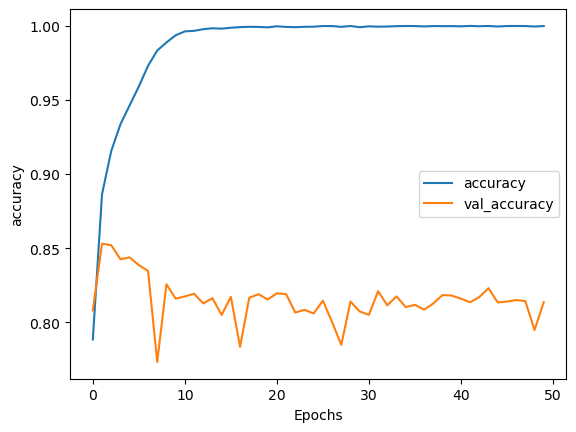

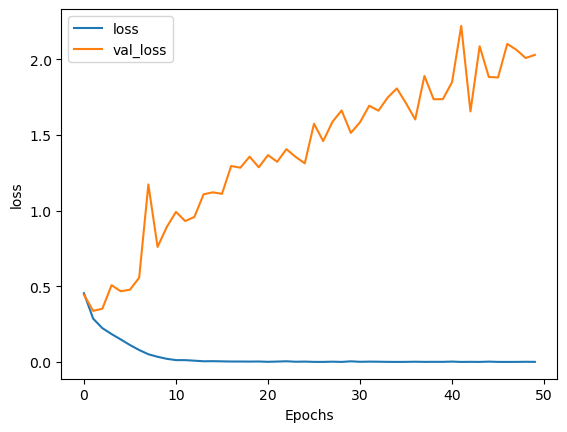

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")